In [4]:
import librosa
import numpy as np
import scipy.io
import scipy
import matplotlib.pyplot as plt
import seaborn
from IPython.display import Audio

seaborn.set(style='ticks')

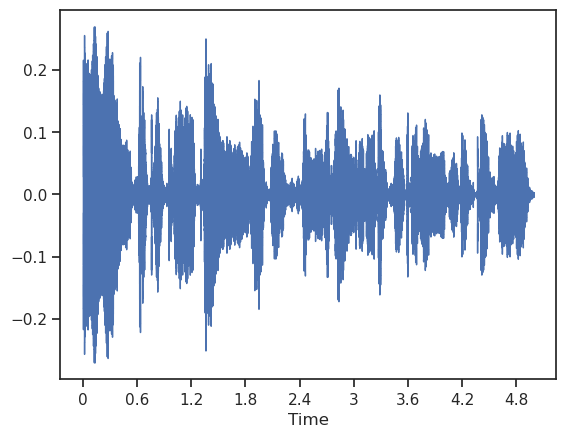

In [5]:
signaal, sr1 = librosa.load("output.wav")
librosa.display.waveshow(signaal)

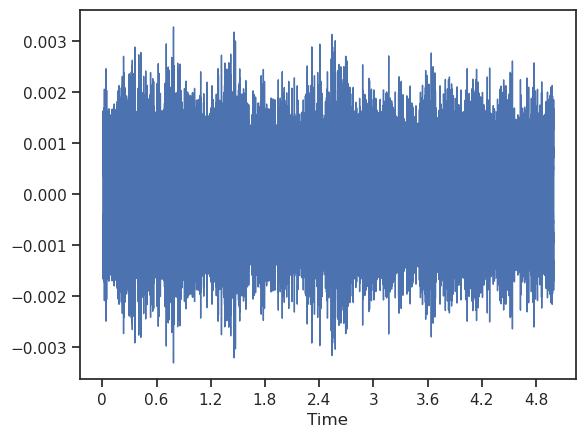

In [6]:
noise, sr2 = librosa.load("noise.wav")
librosa.display.waveshow(noise)

<h2>Manual method 1</h2>

In [26]:
noise_free_power = np.mean(np.square(noise))
signal_power = np.mean(np.square(signaal))

snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
print("SNR value for the 1st recording (dB):", snr)


SNR value for the 1st recording (dB): 36.096439361572266


<h2>Manual method 2</h2>

In [22]:
def snr_simple(your_file):
    signal, sr = librosa.load(your_file)
    signal = np.sum(np.square(signal)) / len(signal)
    noise = np.mean(np.square(signal))

    snr_ratio = 10 * np.log10(signal/noise)

    return snr_ratio

final_val = snr_simple('output.wav')

print(f"Signal-to-Noise Ratio (SNR): {final_val:.2f} dB")

Signal-to-Noise Ratio (SNR): 26.00 dB


<h2>Manual method 3</h2>